Mechanics of Solid Polymers, Ex. 6.2.6 (Bergstrom)

In [1]:
from pylab import*
import matplotlib.pyplot as plt
%matplotlib notebook
from scipy.integrate import quad
from scipy.interpolate import interp1d


Relaxation Modulus is defined as (1):
$$
E_R(t) = E_0[1 - \sum_{i=1}^{N} g_i(1 - e^{\frac{-t}{\tau_i}})]  
$$
Where:
$$
\tau_i \equiv \text{Characteristic Relaxation Time Constant}\\
$$
$$
g_i \equiv \text{1st Prony Term} \\
$$
Stress is calculated using (2):
$$
\sigma(t) = \int^{t}_{0} E_0\dot{\epsilon}_0\tau_0(1 - e^{\frac{-(t-\tau)}{\tau_0}})d\tau
$$
Simplified to (2a):
$$
\sigma(t) = E_0\dot{\epsilon}_0\tau_0(1 - e^{\frac{-t}{\tau_0}}) 
$$
Or rewritten in terms of strains (2b):
$$
\sigma(t) = E_0\dot{\epsilon}_0\tau_0(1 - e^{\frac{-\epsilon}{\dot{\epsilon}_0\tau_0}}) 
$$
Where:
$$
\tau_0 \equiv \tau_i \equiv \text{Characteristic Relaxation Time Constant}
$$
$$
\epsilon_0 \equiv \text{Equivalent strain jump} \\
$$

In [2]:
def integrand(tau,tmax,timeVec,strainVec,params):
    E0 = params[0]
    g = params[1::2]
    tauG = params[2::2]
    ER = E0 * (1 - sum(g * (1-exp((-tmax + tau)/tauG))))
    f = interp1d(timeVec,strainVec)
    edot = (f(tau+1E-5) - f(tau)) / 1E-5
    return ER * edot

def mat_LVE(timeVec,strainVec,params):
    """Linear Viscoelasticity, Uniaxial Loading"""
    stressVec = zeros(len(timeVec))
    for i in arange(len(timeVec)):
        tmax = timeVec[i]
        stressVec[i] = quad(integrand,0,tmax,args=(tmax,timeVec,strainVec,params))[0]
    return stressVec


<IPython.core.display.Javascript object>


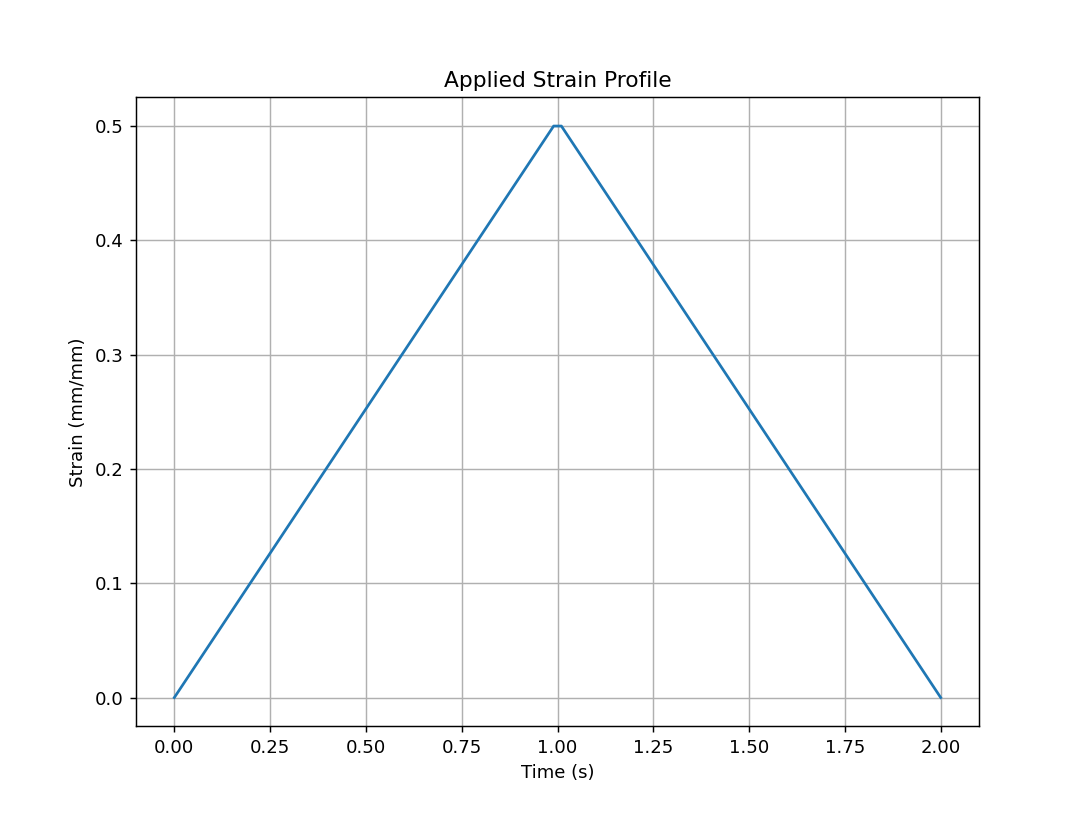

<IPython.core.display.Javascript object>


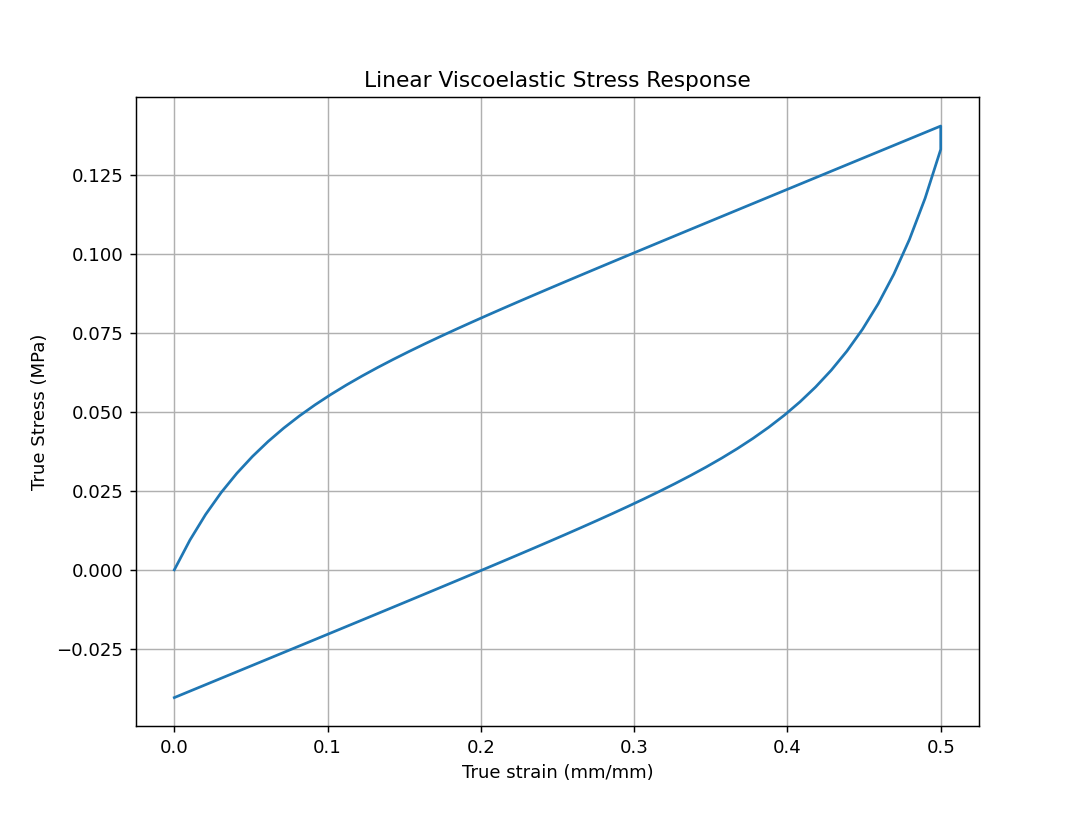

In [3]:
# [Instantaneous Young's modulus, 1st Prony Term, 1st Characteristic Relaxation Time Constant,...]
params = [1.0,0.8,0.1]
time = linspace(0,2,100)
# Define applied strain profile - loading + unloading
strain = concatenate((linspace(0,0.5),linspace(0.5,0)))
# Calculate LVE stress response
stress = mat_LVE(time,strain,params)

# Plot applied strain profile
plt.figure(1)
plt.plot(time,strain)
plt.grid()
plt.title('Applied Strain Profile')
plt.xlabel('Time (s)')
plt.ylabel('Strain (mm/mm)')
# Plot viscoelastic stress response
plt.figure(2)
plt.plot(strain,stress,label='LVE')
plt.grid()
plt.title('Linear Viscoelastic Stress Response')
plt.ylabel('True Stress (MPa)')
plt.xlabel('True strain (mm/mm)')
plt.show()